In [28]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [8]:
env = gym.make("Blackjack-v1", sab=True, render_mode="human")

In [30]:
# Monte Carlo Control with Exploring Starts
def mc_control_es(env, num_episodes, gamma=0.9, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))  # action-value function
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    episode_rewards = []

    for i_episode in range(1, num_episodes + 1):
        # Print progress every 1000 episodes
        if i_episode % 1000 == 0:
            print(f"Episode {i_episode}/{num_episodes}")

        # Generate one episode
        episode = []
        state, _ = env.reset()
        done = False

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, truncated, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        episode_rewards.append(sum([x[2] for x in episode]))

        # Track state-action pairs we've seen
        seen_state_actions = set()
        G = 0
        for t in reversed(range(len(episode))):
            state_t, action_t, reward_t = episode[t]
            G = gamma * G + reward_t

            if (state_t, action_t) not in seen_state_actions:
                returns_sum[(state_t, action_t)] += G
                returns_count[(state_t, action_t)] += 1
                Q[state_t][action_t] = returns_sum[(state_t, action_t)] / returns_count[(state_t, action_t)]
                seen_state_actions.add((state_t, action_t))

    policy = {s: np.argmax(a) for s, a in Q.items()}
    return policy, Q, episode_rewards


In [31]:
def plot_learning_curve(rewards, window=100):
    rolling_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.plot(rolling_avg)
    plt.title("Learning Curve: Rolling Average Reward")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.grid(True)
    plt.show()


Episode 1000/100000
Episode 2000/100000
Episode 3000/100000
Episode 4000/100000
Episode 5000/100000
Episode 6000/100000
Episode 7000/100000
Episode 8000/100000
Episode 9000/100000
Episode 10000/100000
Episode 11000/100000
Episode 12000/100000
Episode 13000/100000
Episode 14000/100000
Episode 15000/100000
Episode 16000/100000
Episode 17000/100000
Episode 18000/100000
Episode 19000/100000
Episode 20000/100000
Episode 21000/100000
Episode 22000/100000
Episode 23000/100000
Episode 24000/100000
Episode 25000/100000
Episode 26000/100000
Episode 27000/100000
Episode 28000/100000
Episode 29000/100000
Episode 30000/100000
Episode 31000/100000
Episode 32000/100000
Episode 33000/100000
Episode 34000/100000
Episode 35000/100000
Episode 36000/100000
Episode 37000/100000
Episode 38000/100000
Episode 39000/100000
Episode 40000/100000
Episode 41000/100000
Episode 42000/100000
Episode 43000/100000
Episode 44000/100000
Episode 45000/100000
Episode 46000/100000
Episode 47000/100000
Episode 48000/100000
E

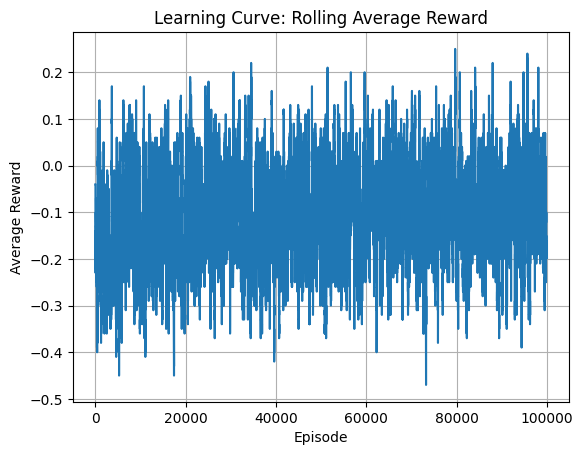

In [13]:
policy, Q, rewards = mc_control_es(env, num_episodes=100_000)
plot_learning_curve(rewards)

In [32]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

env = gym.make("Blackjack-v1", sab=True)

def epsilon_greedy(Q, state, nA, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(nA)
    return np.argmax(Q[state])

def mc_control_epsilon_greedy(env, num_episodes=500_000, gamma=0.9, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    rewards = []

    for i in range(num_episodes):
        state, _ = env.reset()
        episode = []

        if i % 1000 == 0:
            print(f"Episode {i}/{num_episodes}")

        done = False
        while not done:
            action = epsilon_greedy(Q, state, env.action_space.n, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        rewards.append(sum([x[2] for x in episode]))

        G = 0
        visited = set()
        for t in reversed(range(len(episode))):
            s, a, r = episode[t]
            G = gamma * G + r
            if (s, a) not in visited:
                returns_sum[(s, a)] += G
                returns_count[(s, a)] += 1
                Q[s][a] = returns_sum[(s, a)] / returns_count[(s, a)]
                visited.add((s, a))

    policy = {s: np.argmax(a) for s, a in Q.items()}
    return policy, Q, rewards


In [33]:
def plot_rewards(rewards, window=10000):
    avg_rewards = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.figure(figsize=(10, 5))
    plt.plot(avg_rewards)
    plt.title("Średnia nagroda (rolling window)")
    plt.xlabel("Epizod")
    plt.ylabel("Średnia nagroda")
    plt.grid(True)
    plt.show()


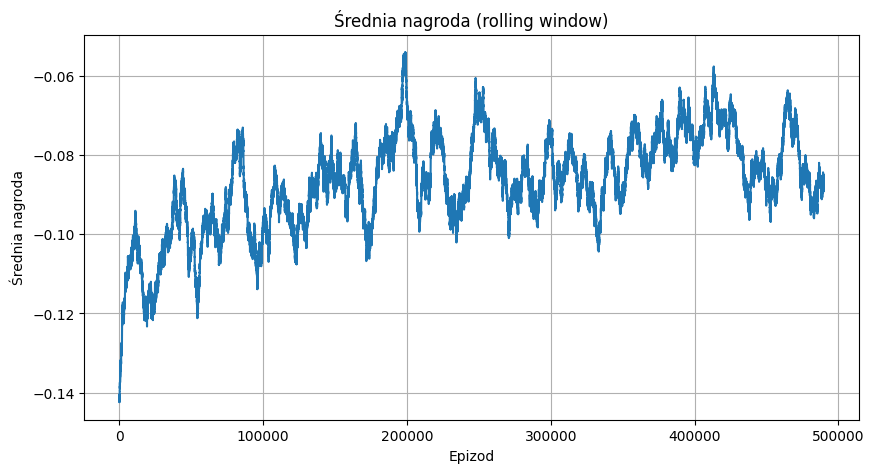

In [16]:
policy, Q, rewards = mc_control_epsilon_greedy(env, num_episodes=500_000)
plot_rewards(rewards)


Episode 0/5000000
Episode 1000/5000000
Episode 2000/5000000
Episode 3000/5000000
Episode 4000/5000000
Episode 5000/5000000
Episode 6000/5000000
Episode 7000/5000000
Episode 8000/5000000
Episode 9000/5000000
Episode 10000/5000000
Episode 11000/5000000
Episode 12000/5000000
Episode 13000/5000000
Episode 14000/5000000
Episode 15000/5000000
Episode 16000/5000000
Episode 17000/5000000
Episode 18000/5000000
Episode 19000/5000000
Episode 20000/5000000
Episode 21000/5000000
Episode 22000/5000000
Episode 23000/5000000
Episode 24000/5000000
Episode 25000/5000000
Episode 26000/5000000
Episode 27000/5000000
Episode 28000/5000000
Episode 29000/5000000
Episode 30000/5000000
Episode 31000/5000000
Episode 32000/5000000
Episode 33000/5000000
Episode 34000/5000000
Episode 35000/5000000
Episode 36000/5000000
Episode 37000/5000000
Episode 38000/5000000
Episode 39000/5000000
Episode 40000/5000000
Episode 41000/5000000
Episode 42000/5000000
Episode 43000/5000000
Episode 44000/5000000
Episode 45000/5000000
E

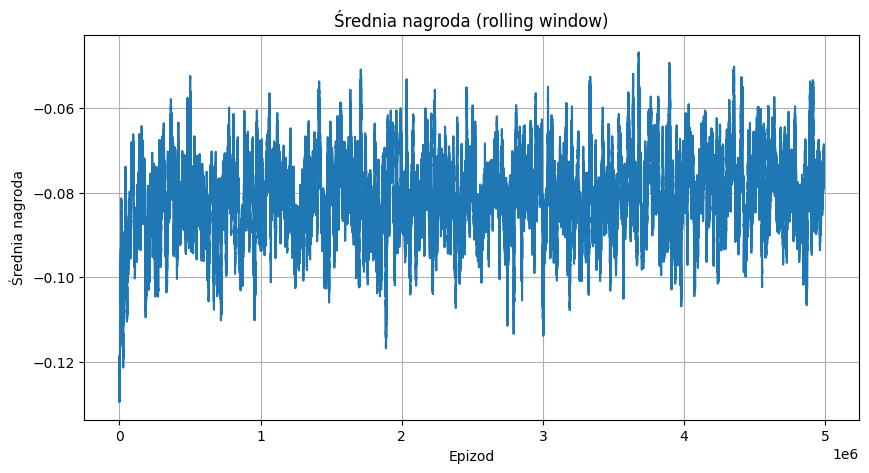

In [20]:
policy, Q, rewards = mc_control_epsilon_greedy(env, num_episodes=5_000_000)
plot_rewards(rewards)


In [ ]:
print(Q)

# Wersja 2

In [34]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import tqdm

In [35]:
def create_blackjack_environment():
    """Create the Blackjack environment with specified parameters."""
    return gym.make('Blackjack-v1', natural=False, sab=False)

In [36]:
class RLAgent:
    def __init__(self, env, learning_rate=0.01, discount_factor=0.9, epsilon=0.1):
        """
        Initialize Q-learning agent for env (Blackjack).

        Args:
            env: (Blackjack) environment
            learning_rate: Alpha (learning rate)
            discount_factor: Gamma (discount factor)
            epsilon: Exploration rate for epsilon-greedy policy
        """
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon

        # Initialize Q-table as a nested defaultdict for player sum, dealer card, usable ace, and actions
        self.q_table = defaultdict(lambda: np.zeros(env.action_space.n))

        # For tracking learning performance
        self.episode_rewards = []
        self.average_rewards = []
        self.cumulative_rewards = []

        # RNG
        self.rng = np.random.default_rng()

    def choose_action(self, state):
        """
        Select action using epsilon-greedy policy.

        Args:
            state: Current state in env (in Blackjack: player sum, dealer card, usable ace)

        Returns:
            Action to take (in Blackjack 0: stick, 1: hit)
        """
        if self.rng.random() < self.epsilon:
            # Explore: choose random action
            return self.env.action_space.sample()
        else:
            # Exploit: choose best action
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state, done):
        """
        Update Q-value using Q-learning update rule.

        Args:
            state: Current state
            action: Action taken
            reward: Reward received
            next_state: Next state
            done: Whether episode is done
        """
        # Get best action value for next state
        best_next_action_value = np.max(self.q_table[next_state]) if not done else 0

        # Current Q-value
        current_q = self.q_table[state][action]

        # Q-learning update
        new_q = current_q + self.lr * (reward + self.gamma * best_next_action_value - current_q)

        # Update Q-table
        self.q_table[state][action] = new_q

    def train(self, num_episodes=50000):
        """
        Train the agent using Q-learning.

        Args:
            num_episodes: Number of episodes to train

        Returns:
            Trained Q-table
        """
        for episode in tqdm.tqdm(range(num_episodes)):
            # Reset environment and get initial state
            state, _ = self.env.reset()
            done = False
            total_reward = 0

            # Play one episode
            while not done:
                # Choose action using epsilon-greedy policy
                action = self.choose_action(state)

                # Take action and observe next state and reward
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated

                # Update Q-table
                self.update_q_table(state, action, reward, next_state, done)

                # Update state and total reward
                state = next_state
                total_reward += reward

            # Record episode results
            self.episode_rewards.append(total_reward)

            # Calculate and store average reward over last 1000 episodes
            if episode % 1000 == 0 and episode > 0:
                avg_reward = np.mean(self.episode_rewards[-1000:])
                self.average_rewards.append(avg_reward)
                self.cumulative_rewards.append(np.sum(self.episode_rewards))

                # Decay exploration rate
                self.epsilon = max(0.01, self.epsilon * 0.995)

        return self.q_table

    def evaluate(self, num_episodes=10000):
        """
        Evaluate the trained agent.

        Args:
            num_episodes: Number of episodes to evaluate

        Returns:
            Average reward per episode
        """
        total_rewards = 0
        wins = 0
        losses = 0
        draws = 0

        for _ in range(num_episodes):
            state, _ = self.env.reset()
            done = False
            episode_reward = 0

            while not done:
                # Always choose best action (no exploration)
                action = np.argmax(self.q_table[state])

                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated

                episode_reward += reward
                state = next_state

            total_rewards += episode_reward

            # Count outcomes
            if episode_reward > 0:
                wins += 1
            elif episode_reward < 0:
                losses += 1
            else:
                draws += 1

        avg_reward = total_rewards / num_episodes
        win_rate = wins / num_episodes

        print(f"Evaluation over {num_episodes} episodes:")
        print(f"Average reward: {avg_reward:.4f}")
        print(f"Win rate: {win_rate:.4f}")
        print(f"Wins: {wins}, Losses: {losses}, Draws: {draws}")

        return avg_reward

    def plot_learning_curve(self):
        """Plot the learning curve showing rewards over episodes."""
        plt.figure(figsize=(12, 5))

        # Plot average rewards
        plt.subplot(1, 2, 1)
        plt.plot([i*1000 for i in range(len(self.average_rewards))],
                 self.average_rewards, label='Average Reward (per 1000 episodes)')
        plt.xlabel('Episodes')
        plt.ylabel('Average Reward')
        plt.title('Learning Curve: Average Reward')
        plt.legend()
        plt.grid(True)

        # Plot moving average of raw rewards for better visualization
        plt.subplot(1, 2, 2)
        window_size = 1000
        moving_avg = [np.mean(self.episode_rewards[max(0, i-window_size):i+1])
                      for i in range(len(self.episode_rewards))]
        plt.plot(moving_avg, label=f'Moving Average (window={window_size})')
        plt.xlabel('Episodes')
        plt.ylabel('Reward')
        plt.title('Learning Curve: Moving Average Reward')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.savefig('blackjack_learning_curve.png')
        plt.show()

    def visualize_policy(self):
        """Visualize the learned policy for different player sums and dealer cards."""
        # Create separate visualizations for with and without usable ace
        for usable_ace in [False, True]:
            # Create grid of player sums and dealer cards
            player_sums = np.arange(11, 22)  # 11-21
            dealer_cards = np.arange(1, 11)  # 1-10

            # Initialize policy grid
            policy = np.zeros((len(player_sums), len(dealer_cards)))

            # Fill in policy grid
            for i, player_sum in enumerate(player_sums):
                for j, dealer_card in enumerate(dealer_cards):
                    state = (player_sum, dealer_card, int(usable_ace))
                    # Get best action (0: stick, 1: hit)
                    action = np.argmax(self.q_table[state]) if state in self.q_table else 0
                    policy[i, j] = action

            # Plot policy
            plt.figure(figsize=(8, 6))
            plt.imshow(policy, cmap='viridis', interpolation='nearest')
            plt.colorbar(label='Action (0: Stick, 1: Hit)')
            plt.xlabel('Dealer Card')
            plt.ylabel('Player Sum')
            plt.title(f'Optimal Policy (Usable Ace: {usable_ace})')
            plt.xticks(np.arange(len(dealer_cards)), dealer_cards)
            plt.yticks(np.arange(len(player_sums)), player_sums)
            plt.grid(False)
            plt.savefig(f'blackjack_policy_usable_ace_{usable_ace}.png')
            plt.show()

# Black Jack

100%|██████████| 500000/500000 [01:22<00:00, 6046.88it/s]


Evaluation over 10000 episodes:
Average reward: -0.0556
Win rate: 0.4259
Wins: 4259, Losses: 4815, Draws: 926


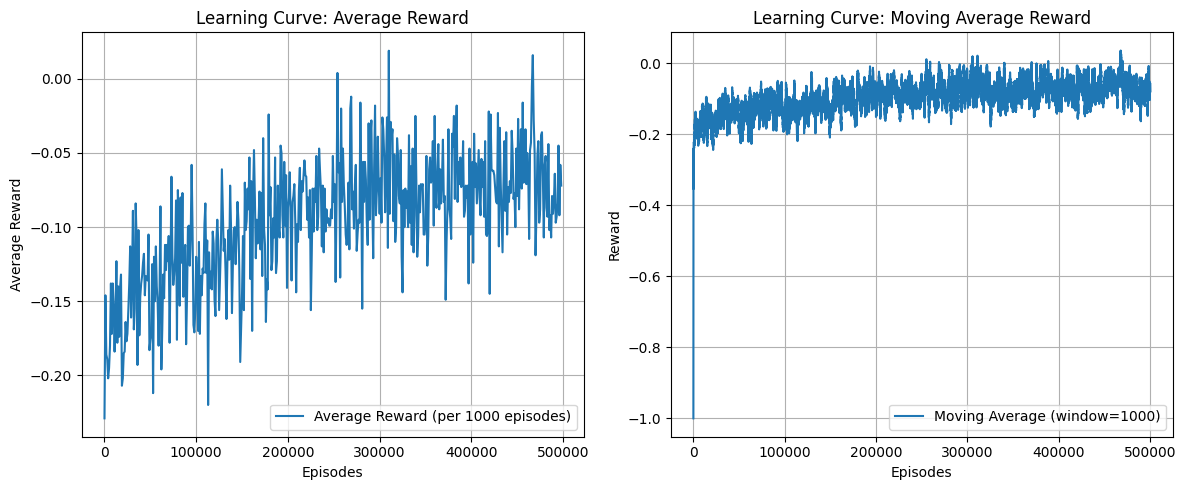

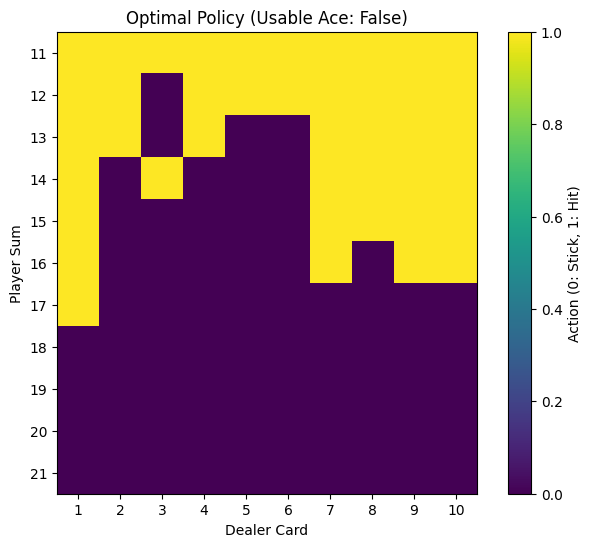

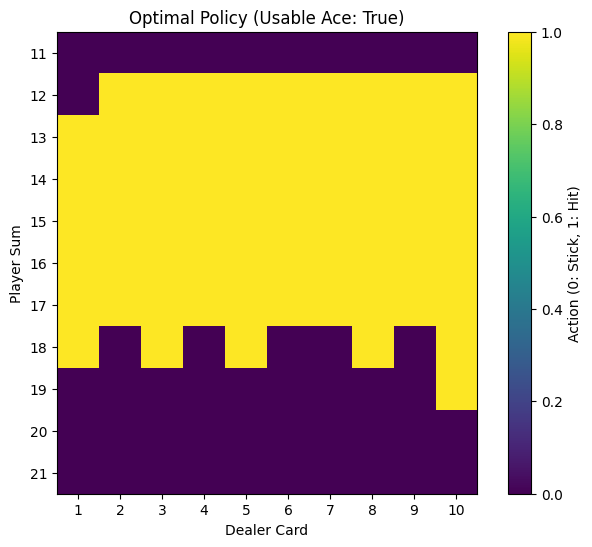

In [39]:
# Create environment
env = create_blackjack_environment()

# Create and train agent
agent = RLAgent(env, learning_rate=0.01, discount_factor=0.8, epsilon=0.3)
agent.train(num_episodes=500_000) # 100_000 5_000_000

# Evaluate agent
agent.evaluate(num_episodes=10_000)

# Plot learning curve
agent.plot_learning_curve()

# Visualize learned policy
agent.visualize_policy()

# Close environment
env.close()

# ContinuousRLAgent

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import tqdm

class ContinuousRLAgent:
    def __init__(self, env, learning_rate=0.01, discount_factor=0.9, epsilon=0.1, bins=10):
        """
        Initialize Q-learning agent for environment with continuous state space.

        Args:
            env: Gymnasium environment
            learning_rate: Alpha (learning rate)
            discount_factor: Gamma (discount factor)
            epsilon: Exploration rate for epsilon-greedy policy
            bins: Number of bins for discretizing continuous states
        """
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.bins = bins

        # Get state and action space dimensions
        self.obs_dim = env.observation_space.shape[0]
        self.action_dim = env.action_space.n if hasattr(env.action_space, 'n') else env.action_space.shape[0]

        # Define discretization ranges for each state dimension
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low

        # Handle infinite bounds by setting reasonable limits
        for i in range(self.obs_dim):
            if self.obs_high[i] == np.inf:
                self.obs_high[i] = 10.0
            if self.obs_low[i] == -np.inf:
                self.obs_low[i] = -10.0

        # Initialize Q-table
        self.q_table = defaultdict(lambda: np.zeros(self.action_dim))

        # For tracking learning performance
        self.episode_rewards = []
        self.average_rewards = []
        self.cumulative_rewards = []

        # RNG
        self.rng = np.random.default_rng()

    def discretize_state(self, state):
        """
        Discretize continuous state into bins for Q-table indexing.

        Args:
            state: Continuous state vector

        Returns:
            Tuple of discretized state values
        """
        # Clip state to defined bounds
        state = np.clip(state, self.obs_low, self.obs_high)

        # Discretize each dimension
        discretized = []
        for i in range(self.obs_dim):
            scaling = ((state[i] - self.obs_low[i]) /
                       (self.obs_high[i] - self.obs_low[i]))
            scaled_value = int(scaling * (self.bins - 1))
            discretized.append(scaled_value)

        return tuple(discretized)

    def choose_action(self, state):
        """
        Select action using epsilon-greedy policy.

        Args:
            state: Current state in environment

        Returns:
            Action to take
        """
        # Discretize state for Q-table lookup
        state_key = self.discretize_state(state)

        if self.rng.random() < self.epsilon:
            # Explore: choose random action
            return self.env.action_space.sample()
        else:
            # Exploit: choose best action
            return np.argmax(self.q_table[state_key])

    def update_q_table(self, state, action, reward, next_state, done):
        """
        Update Q-value using Q-learning update rule.

        Args:
            state: Current state
            action: Action taken
            reward: Reward received
            next_state: Next state
            done: Whether episode is done
        """
        # Discretize states for Q-table lookup
        state_key = self.discretize_state(state)
        next_state_key = self.discretize_state(next_state)

        # Get best action value for next state
        best_next_action_value = np.max(self.q_table[next_state_key]) if not done else 0

        # Current Q-value
        current_q = self.q_table[state_key][action]

        # Q-learning update rule
        new_q = current_q + self.lr * (reward + self.gamma * best_next_action_value - current_q)

        # Update Q-table
        self.q_table[state_key][action] = new_q

    def train(self, num_episodes=10000, max_steps=1000):
        """
        Train the agent using Q-learning.

        Args:
            num_episodes: Number of episodes to train
            max_steps: Maximum steps per episode

        Returns:
            Trained Q-table
        """
        for episode in tqdm.tqdm(range(num_episodes)):
            # Reset environment and get initial state
            state, _ = self.env.reset()
            done = False
            total_reward = 0
            steps = 0

            # Play one episode
            while not done and steps < max_steps:
                # Choose action using epsilon-greedy policy
                action = self.choose_action(state)

                # Take action and observe next state and reward
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated

                # Update Q-table
                self.update_q_table(state, action, reward, next_state, done)

                # Update state and total reward
                state = next_state
                total_reward += reward
                steps += 1

            # Record episode results
            self.episode_rewards.append(total_reward)

            # Calculate and store average reward over last 100 episodes
            if episode % 100 == 0 and episode > 0:
                avg_reward = np.mean(self.episode_rewards[-100:])
                self.average_rewards.append(avg_reward)
                self.cumulative_rewards.append(np.sum(self.episode_rewards))

                # Decay exploration rate
                self.epsilon = max(0.01, self.epsilon * 0.995)

        return self.q_table

    def evaluate(self, num_episodes=100, max_steps=1000, render=False):
        """
        Evaluate the trained agent.

        Args:
            num_episodes: Number of episodes to evaluate
            max_steps: Maximum steps per episode
            render: Whether to render the environment

        Returns:
            Average reward per episode
        """
        total_rewards = 0
        success_episodes = 0
        total_steps = 0

        for ep in range(num_episodes):
            state, _ = self.env.reset()
            done = False
            episode_reward = 0
            steps = 0

            while not done and steps < max_steps:
                # Always choose best action (no exploration)
                state_key = self.discretize_state(state)
                action = np.argmax(self.q_table[state_key])

                next_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated

                episode_reward += reward
                state = next_state
                steps += 1

                if render and ep == 0:  # Render first episode only
                    self.env.render()

            total_rewards += episode_reward
            total_steps += steps

            # Count episodes where the agent succeeded (environment-specific)
            if episode_reward > 195:  # For CartPole, success is often defined as 195+ reward
                success_episodes += 1

        avg_reward = total_rewards / num_episodes
        avg_steps = total_steps / num_episodes
        success_rate = success_episodes / num_episodes

        print(f"Evaluation over {num_episodes} episodes:")
        print(f"Average reward: {avg_reward:.4f}")
        print(f"Average steps per episode: {avg_steps:.2f}")
        print(f"Success rate: {success_rate:.4f}")

        return avg_reward

    def plot_learning_curve(self):
        """Plot the learning curve showing rewards over episodes."""
        plt.figure(figsize=(12, 5))

        # Plot average rewards
        plt.subplot(1, 2, 1)
        plt.plot([i*100 for i in range(len(self.average_rewards))],
                 self.average_rewards, label='Average Reward (per 100 episodes)')
        plt.xlabel('Episodes')
        plt.ylabel('Average Reward')
        plt.title(f'Learning Curve: Average Reward (γ={self.gamma})')
        plt.legend()
        plt.grid(True)

        # Plot moving average of raw rewards for better visualization
        plt.subplot(1, 2, 2)
        window_size = 100
        moving_avg = [np.mean(self.episode_rewards[max(0, i-window_size):i+1])
                      for i in range(0, len(self.episode_rewards), window_size)]
        plt.plot(range(0, len(self.episode_rewards), window_size), moving_avg,
                 label=f'Moving Average (window={window_size})')
        plt.xlabel('Episodes')
        plt.ylabel('Reward')
        plt.title(f'Learning Curve: Moving Average Reward (γ={self.gamma})')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.savefig(f'learning_curve_gamma_{self.gamma}.png')
        plt.show()

    def visualize_policy_2d(self, dim1=0, dim2=1, slices=None):
        """
        Visualize a 2D slice of the learned policy.

        Args:
            dim1, dim2: The two dimensions to visualize
            slices: Dictionary with fixed values for other dimensions
        """
        if slices is None:
            slices = {}

        # Create meshgrid for the two selected dimensions
        dim1_space = np.linspace(self.obs_low[dim1], self.obs_high[dim1], self.bins)
        dim2_space = np.linspace(self.obs_low[dim2], self.obs_high[dim2], self.bins)

        X, Y = np.meshgrid(dim1_space, dim2_space)
        policy = np.zeros((self.bins, self.bins))

        # Fill in policy grid
        for i in range(self.bins):
            for j in range(self.bins):
                # Create state with fixed values for non-visualized dimensions
                state = np.zeros(self.obs_dim)
                for k in range(self.obs_dim):
                    if k == dim1:
                        state[k] = dim1_space[i]
                    elif k == dim2:
                        state[k] = dim2_space[j]
                    else:
                        state[k] = slices.get(k, 0)  # Use provided slice value or default to 0

                # Get best action for this state
                state_key = self.discretize_state(state)
                if state_key in self.q_table:
                    policy[j, i] = np.argmax(self.q_table[state_key])  # Note: j, i for correct orientation

        # Plot policy
        plt.figure(figsize=(10, 8))
        plt.imshow(policy, cmap='viridis', interpolation='nearest',
                   extent=[self.obs_low[dim1], self.obs_high[dim1],
                           self.obs_low[dim2], self.obs_high[dim2]])
        plt.colorbar(label='Action')
        plt.xlabel(f'State dimension {dim1}')
        plt.ylabel(f'State dimension {dim2}')
        plt.title(f'Policy Slice (γ={self.gamma})')
        plt.grid(False)
        plt.savefig(f'policy_slice_gamma_{self.gamma}.png')
        plt.show()

In [16]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def run_experiment(discount_factors=[0.9, 0.99, 0.5], environment_name='CartPole-v1'):
    """
    Run experiments with different discount factors and compare results.

    Args:
        discount_factors: List of discount factors to test
        environment_name: Name of the Gymnasium environment
    """
    # Store results for comparison
    all_avg_rewards = []
    all_episode_rewards = []

    for gamma in discount_factors:
        print(f"\nTraining with discount factor γ={gamma}")

        # Create environment
        env = gym.make(environment_name, render_mode="human")

        # Create and train agent
        agent = ContinuousRLAgent(
            env,
            learning_rate=0.1,
            discount_factor=gamma,
            epsilon=0.3,
            bins=50  # Number of bins for state discretization
        )

        # Train agent
        agent.train(num_episodes=5000, max_steps=500)

        # Evaluate agent
        avg_reward = agent.evaluate(num_episodes=10000, render=True)
        all_avg_rewards.append(avg_reward)
        all_episode_rewards.append(agent.episode_rewards)

        # Plot learning curve
        agent.plot_learning_curve()

        # Visualize policy (for CartPole, we'll visualize dimensions 0 and 2)
        # These correspond to cart position and pole angle
        agent.visualize_policy_2d(dim1=0, dim2=2)

        # Close environment
        env.close()

    # Compare learning curves for different discount factors
    compare_learning_curves(discount_factors, all_episode_rewards)

    # Compare final performance
    compare_final_performance(discount_factors, all_avg_rewards)

def compare_learning_curves(discount_factors, all_episode_rewards):
    """Plot learning curves for different discount factors side by side."""
    plt.figure(figsize=(12, 6))

    window_size = 100
    for i, gamma in enumerate(discount_factors):
        rewards = all_episode_rewards[i]
        # Calculate moving average
        moving_avg = [np.mean(rewards[max(0, j-window_size):j+1])
                      for j in range(0, len(rewards), window_size)]
        episodes = range(0, len(rewards), window_size)

        plt.plot(episodes, moving_avg, label=f'γ={gamma}')

    plt.xlabel('Episodes')
    plt.ylabel('Average Reward')
    plt.title('Learning Curves for Different Discount Factors')
    plt.legend()
    plt.grid(True)
    plt.savefig('comparison_learning_curves.png')
    plt.show()

def compare_final_performance(discount_factors, all_avg_rewards):
    """Plot bar chart comparing final performance for different discount factors."""
    plt.figure(figsize=(10, 6))
    plt.bar([f'γ={gamma}' for gamma in discount_factors], all_avg_rewards)
    plt.ylabel('Average Reward')
    plt.title('Final Performance Comparison')
    plt.grid(axis='y')
    plt.savefig('comparison_final_performance.png')
    plt.show()

In [17]:
run_experiment(discount_factors=[0.99, 0.8, 0.5], environment_name='CartPole-v1')


Training with discount factor γ=0.99


  0%|          | 123/500000 [00:40<46:11:06,  3.01it/s]


KeyboardInterrupt: 